In [482]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import metrics

In [483]:
start = '2017-01-01'
end = '2021-10-01'

In [484]:
data = yf.download('CL=F PTTEP.BK GPSC.BK PTTGC.BK PTT.BK', start=start, end=end)

[*********************100%***********************]  5 of 5 completed


In [485]:
df = data['Adj Close']

In [486]:
df.head()

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-03,52.330002,NaN,NaN,NaN,NaN
2017-01-04,53.259998,29.146650,30.196190,74.474815,48.913532
2017-01-05,53.759998,28.555841,30.752441,74.096771,49.104599
2017-01-06,53.990002,28.555841,30.911366,74.474815,48.913532
2017-01-09,51.959999,28.555841,30.434582,73.907753,48.340328


In [487]:
df = df.fillna(method='ffill')
df = df.pct_change()
df = df.dropna()
df = df[["CL=F", "GPSC.BK", "PTTEP.BK", "PTTGC.BK", "PTT.BK"]]

In [488]:
df.head()

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2017-01-05,0.009388,-0.020270,-0.005076,0.003906,0.018421
2017-01-06,0.004278,0.000000,0.005102,-0.003891,0.005168
2017-01-09,-0.037600,0.000000,-0.007614,-0.011719,-0.015424
2017-01-10,-0.021940,0.006897,-0.017903,0.003952,0.013055
2017-01-11,0.028139,0.006849,0.005209,-0.003937,-0.007732


In [489]:
df[df > 0] = 1
df[df < 0] = 0

In [490]:
df.dtypes

CL=F        float64
GPSC.BK     float64
PTTEP.BK    float64
PTTGC.BK    float64
PTT.BK      float64
dtype: object

In [491]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [492]:
X.head()

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK
Date,,,,
2017-01-05,1.0,0.0,0.0,1.0
2017-01-06,1.0,0.0,1.0,0.0
2017-01-09,0.0,0.0,0.0,0.0
2017-01-10,0.0,1.0,0.0,1.0
2017-01-11,1.0,1.0,1.0,0.0


In [493]:
y.head()

Date
2017-01-05    1.0
2017-01-06    1.0
2017-01-09    0.0
2017-01-10    1.0
2017-01-11    0.0
Name: PTT.BK, dtype: float64

In [494]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [495]:
from sklearn.linear_model import LogisticRegression

In [496]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [497]:
logreg.predict_proba(X_test)

array([[0.81578069, 0.18421931],
       [0.17220156, 0.82779844],
       [0.70059054, 0.29940946],
       [0.88609912, 0.11390088],
       [0.17220156, 0.82779844],
       [0.33364858, 0.66635142],
       [0.17220156, 0.82779844],
       [0.29960581, 0.70039419],
       [0.19581528, 0.80418472],
       [0.29960581, 0.70039419],
       [0.66085496, 0.33914504],
       [0.29960581, 0.70039419],
       [0.88609912, 0.11390088],
       [0.88609912, 0.11390088],
       [0.17220156, 0.82779844],
       [0.48654779, 0.51345221],
       [0.17220156, 0.82779844],
       [0.90105008, 0.09894992],
       [0.48654779, 0.51345221],
       [0.88609912, 0.11390088],
       [0.19581528, 0.80418472],
       [0.81578069, 0.18421931],
       [0.29960581, 0.70039419],
       [0.81578069, 0.18421931],
       [0.90105008, 0.09894992],
       [0.17220156, 0.82779844],
       [0.66085496, 0.33914504],
       [0.88609912, 0.11390088],
       [0.49293458, 0.50706542],
       [0.70059054, 0.29940946],
       [0.

In [498]:
y_pred = logreg.predict(X_test)

In [499]:
y_pred

array([0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1.

In [500]:
compare = pd.DataFrame(logreg.predict_proba(X_test))
compare["y_pred"] = y_pred
compare

,0,1,y_pred
0,0.815781,0.184219,0.0
1,0.172202,0.827798,1.0
2,0.700591,0.299409,0.0
3,0.886099,0.113901,0.0
4,0.172202,0.827798,1.0
...,...,...,...
241,0.901050,0.098950,0.0
242,0.815781,0.184219,0.0
243,0.901050,0.098950,0.0
244,0.624727,0.375273,0.0


In [501]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[120,  27],
       [ 37,  62]], dtype=int64)

Text(0.5, 15.0, 'Predicted')

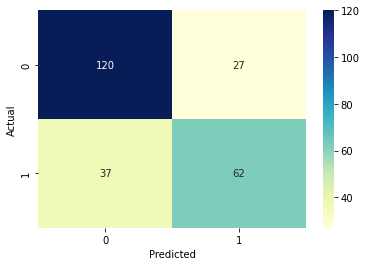

In [502]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [503]:
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))
print("Precision = ", metrics.precision_score(y_test, y_pred))
print("Recall = ", np.sqrt(metrics.recall_score(y_test, y_pred)))
print("F1 = ", np.sqrt(metrics.f1_score(y_test, y_pred)))

Accuracy =  0.7398373983739838
Precision =  0.6966292134831461
Recall =  0.7913675671030664
F1 =  0.8121419014464815


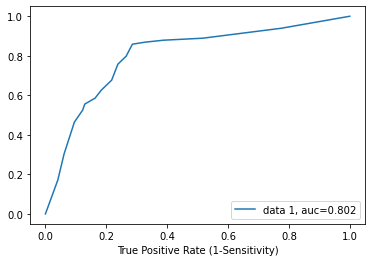

In [504]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc=" + str(round(auc, 3)))
plt.legend(loc=4)
plt.xlabel("False Positive Rate (1-Specificity)")
plt.xlabel("True Positive Rate (1-Sensitivity)")
plt.show()

In [505]:
data = yf.download('CL=F PTTEP.BK GPSC.BK PTTGC.BK PTT.BK', start=start, end=end)
df = data['Adj Close']
df = df.fillna(method='ffill')
df = df.pct_change()
df = df.dropna()
df = df[["CL=F", "GPSC.BK", "PTTEP.BK", "PTTGC.BK", "PTT.BK"]]

[*********************100%***********************]  5 of 5 completed


In [506]:
df.head()

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2017-01-05,0.009388,-0.020270,-0.005076,0.003906,0.018421
2017-01-06,0.004278,0.000000,0.005102,-0.003891,0.005168
2017-01-09,-0.037600,0.000000,-0.007614,-0.011719,-0.015424
2017-01-10,-0.021940,0.006897,-0.017903,0.003952,0.013055
2017-01-11,0.028139,0.006849,0.005209,-0.003937,-0.007732


In [507]:
df[df > 0] = 1
df[df < 0] = -1

In [508]:
df

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2017-01-05,1.0,-1.0,-1.0,1.0,1.0
2017-01-06,1.0,0.0,1.0,-1.0,1.0
2017-01-09,-1.0,0.0,-1.0,-1.0,-1.0
2017-01-10,-1.0,1.0,-1.0,1.0,1.0
2017-01-11,1.0,1.0,1.0,-1.0,-1.0
...,...,...,...,...,...
2021-09-24,1.0,0.0,0.0,0.0,0.0
2021-09-27,1.0,-1.0,1.0,1.0,1.0
2021-09-28,-1.0,-1.0,1.0,1.0,0.0


In [509]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [510]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Multiple Classes

In [511]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 0, 90, 13],
       [ 0, 30, 14],
       [ 0, 37, 62]], dtype=int64)

Text(0.5, 15.0, 'Predicted')

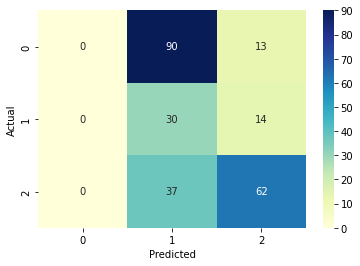

In [512]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [513]:
(y_test==0).sum()

44

In [514]:
data.swaplevel(0, axis=1)["PTT.BK"]

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,30.196188,38.000000,38.099998,37.299999,37.400002,75879000.0
2017-01-05,30.752439,38.700001,38.799999,38.200001,38.200001,75282000.0
2017-01-06,30.911362,38.900002,38.900002,38.500000,38.700001,45129000.0
2017-01-09,30.434582,38.299999,39.000000,38.200001,38.900002,40455000.0
...,...,...,...,...,...,...
2021-09-24,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-27,38.509056,40.500000,40.750000,40.000000,40.250000,114666600.0
2021-09-28,38.509056,40.500000,41.000000,40.250000,40.750000,104953600.0


In [515]:
df2 = data.swaplevel(0, axis=1)["PTT.BK"]

In [516]:
df2.dropna(inplace=True)

In [517]:
df2

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-01-04,30.196188,38.000000,38.099998,37.299999,37.400002,75879000.0
2017-01-05,30.752439,38.700001,38.799999,38.200001,38.200001,75282000.0
2017-01-06,30.911362,38.900002,38.900002,38.500000,38.700001,45129000.0
2017-01-09,30.434582,38.299999,39.000000,38.200001,38.900002,40455000.0
2017-01-10,30.831890,38.799999,38.900002,38.200001,38.299999,43224000.0
...,...,...,...,...,...,...
2021-09-23,38.033634,40.000000,40.250000,39.500000,39.750000,63355900.0
2021-09-27,38.509056,40.500000,40.750000,40.000000,40.250000,114666600.0
2021-09-28,38.509056,40.500000,41.000000,40.250000,40.750000,104953600.0


In [518]:
import pandas_ta as ta

In [519]:
df2.ta.macd(append=True)

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2017-01-04,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN
2017-01-10,NaN,NaN,NaN
...,...,...,...
2021-09-23,0.768200,0.128708,0.639493
2021-09-27,0.834421,0.155943,0.678478
2021-09-28,0.876795,0.158653,0.718142


In [520]:
df2.loc[df2["MACD_12_26_9"] > 0, "macd_pos"] = 1
df2.loc[df2["MACD_12_26_9"] < 0, "macd_pos"] = -1

In [521]:
df2.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'macd_pos'],
      dtype='object')

In [522]:
df2["return"] = df2["Close"].shift(-5)/df2["Close"]-1

In [523]:
df2.dropna(inplace=True)

In [524]:
df2.loc[df2["return"] > 0, "return_bin"] = 1
df2.loc[df2["return"] < 0, "return_bin"] = 0

In [525]:
df2.iloc[:, -5:]

,MACDh_12_26_9,MACDs_12_26_9,macd_pos,return,return_bin
Date,,,,,
2017-02-22,-0.303444,0.616797,1.0,-0.007463,0.0
2017-02-23,-0.274720,0.548117,1.0,0.002513,1.0
2017-02-24,-0.240931,0.487884,1.0,-0.007519,0.0
2017-02-27,-0.205188,0.436587,1.0,-0.030000,0.0
2017-02-28,-0.195155,0.387799,1.0,-0.020151,0.0
...,...,...,...,...,...
2021-09-16,0.192943,0.473631,1.0,0.006289,1.0
2021-09-17,0.161562,0.514021,1.0,0.038462,1.0
2021-09-20,0.128737,0.546205,1.0,0.038462,1.0


In [526]:
df3 = df2.iloc[:, -5:]

In [527]:
df3

,MACDh_12_26_9,MACDs_12_26_9,macd_pos,return,return_bin
Date,,,,,
2017-02-22,-0.303444,0.616797,1.0,-0.007463,0.0
2017-02-23,-0.274720,0.548117,1.0,0.002513,1.0
2017-02-24,-0.240931,0.487884,1.0,-0.007519,0.0
2017-02-27,-0.205188,0.436587,1.0,-0.030000,0.0
2017-02-28,-0.195155,0.387799,1.0,-0.020151,0.0
...,...,...,...,...,...
2021-09-16,0.192943,0.473631,1.0,0.006289,1.0
2021-09-17,0.161562,0.514021,1.0,0.038462,1.0
2021-09-20,0.128737,0.546205,1.0,0.038462,1.0


In [528]:
df3.dropna(inplace=True)

In [529]:
X = df3.iloc[:, :-2]
y = df3.iloc[: , -1]

In [530]:
X.head()

,MACDh_12_26_9,MACDs_12_26_9,macd_pos
Date,,,
2017-02-22,-0.303444,0.616797,1.0
2017-02-23,-0.274720,0.548117,1.0
2017-02-24,-0.240931,0.487884,1.0
2017-02-27,-0.205188,0.436587,1.0
2017-02-28,-0.195155,0.387799,1.0


In [531]:
y.head()

Date
2017-02-22    0.0
2017-02-23    1.0
2017-02-24    0.0
2017-02-27    0.0
2017-02-28    0.0
Name: return_bin, dtype: float64

In [532]:
X_train = X.iloc[:700]
X_test = X.iloc[700:]
y_train = y.iloc[:700]
y_test = y.iloc[700:]

In [533]:
X_train

,MACDh_12_26_9,MACDs_12_26_9,macd_pos
Date,,,
2017-02-22,-0.303444,0.616797,1.0
2017-02-23,-0.274720,0.548117,1.0
2017-02-24,-0.240931,0.487884,1.0
2017-02-27,-0.205188,0.436587,1.0
2017-02-28,-0.195155,0.387799,1.0
...,...,...,...
2020-04-01,0.758996,-2.967562,-1.0
2020-04-02,0.979717,-2.722632,-1.0
2020-04-03,1.203205,-2.421831,-1.0


In [534]:
X_test

,MACDh_12_26_9,MACDs_12_26_9,macd_pos
Date,,,
2020-04-09,1.352162,-1.352458,-1.0
2020-04-10,1.249781,-1.040013,1.0
2020-04-13,1.113622,-0.761607,1.0
2020-04-14,0.992800,-0.513407,1.0
2020-04-15,0.837799,-0.303957,1.0
...,...,...,...
2021-09-16,0.192943,0.473631,1.0
2021-09-17,0.161562,0.514021,1.0
2021-09-20,0.128737,0.546205,1.0


In [535]:
y_train

Date
2017-02-22    0.0
2017-02-23    1.0
2017-02-24    0.0
2017-02-27    0.0
2017-02-28    0.0
             ... 
2020-04-01    1.0
2020-04-02    1.0
2020-04-03    1.0
2020-04-07    0.0
2020-04-08    0.0
Name: return_bin, Length: 700, dtype: float64

In [536]:
y_test

Date
2020-04-09    0.0
2020-04-10    0.0
2020-04-13    0.0
2020-04-14    0.0
2020-04-15    0.0
             ... 
2021-09-16    1.0
2021-09-17    1.0
2021-09-20    1.0
2021-09-21    0.0
2021-09-22    0.0
Name: return_bin, Length: 334, dtype: float64

In [537]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Please always check the probability firstly  

In [538]:
logreg.predict_proba(X_test)

array([[0.38899078, 0.61100922],
       [0.44249972, 0.55750028],
       [0.4534546 , 0.5465454 ],
       [0.46323432, 0.53676568],
       [0.47387239, 0.52612761],
       [0.48893678, 0.51106322],
       [0.49707459, 0.50292541],
       [0.50076417, 0.49923583],
       [0.50756492, 0.49243508],
       [0.5143374 , 0.4856626 ],
       [0.51732338, 0.48267662],
       [0.51856353, 0.48143647],
       [0.51935256, 0.48064744],
       [0.52109202, 0.47890798],
       [0.52062236, 0.47937764],
       [0.51636434, 0.48363566],
       [0.51550765, 0.48449235],
       [0.51732915, 0.48267085],
       [0.51603376, 0.48396624],
       [0.51506169, 0.48493831],
       [0.51313686, 0.48686314],
       [0.51350167, 0.48649833],
       [0.51585893, 0.48414107],
       [0.51791846, 0.48208154],
       [0.51839986, 0.48160014],
       [0.51800613, 0.48199387],
       [0.51786491, 0.48213509],
       [0.5179582 , 0.4820418 ],
       [0.52210377, 0.47789623],
       [0.52371993, 0.47628007],
       [0.

In [539]:
y_pred = logreg.predict(X_test)

In [540]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1.

In [541]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[86, 92],
       [81, 75]], dtype=int64)

Text(0.5, 15.0, 'Predicted')

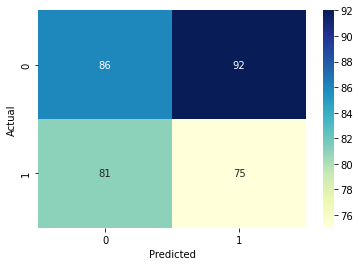

In [542]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")